In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


# Now you try it! Use python to check the answers you find using standard normal probability tables to find probabilities.

As always, first import the needed libraries:

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats
from scipy.stats import norm

**Find the probability of a value being less than or equal to some value in the normal distribution.**

Let x=stick stiffness, x~N(mean=11.38 kN/m,variance=0.01)

What is the probability of x <= 11.26?

**First:** Standardize to create a z-score = (x-mean)/sqrt(var) = (x-mean)/std

In [5]:
z= (11.26-11.38)/np.sqrt(0.01)
print(z)

-1.20000000000001


Let's sketch out the PDF or the standard normal distribution, label the mean and your z-score.

Sketch this out by hand and then use the plotting code below (fill in the loc=mean and scale=std and the x_A variable=your calculated z-score below to plot):

Text(0.5, 1.0, 'Normal Distribution with Mean=0, SD=1')

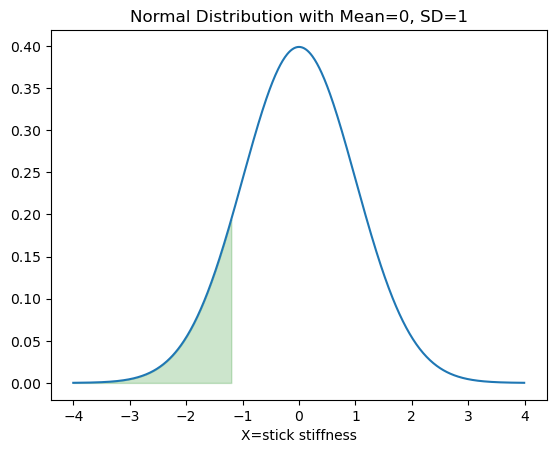

In [6]:
# We can plot this on the pdf to see what we are doing
x_A = np.arange(-4,4,.01)
normal_A=norm.pdf(x_A,loc=0,scale=1)
ax1=sns.lineplot(x=x_A,y=normal_A)
ax2=plt.fill_between(x_A,normal_A, where=(x_A <-1.2),color='g',alpha=.2)
plt.xlabel("X=stick stiffness")
plt.title("Normal Distribution with Mean=0, SD=1")

The probability is the area under the curve less than z=-1.2

This is the CDF of the the standard normal distribution of the PDF up to this value (Z<=z).

Text(0.5, 1.0, 'Normal Distribution with Mean=0, SD=1')

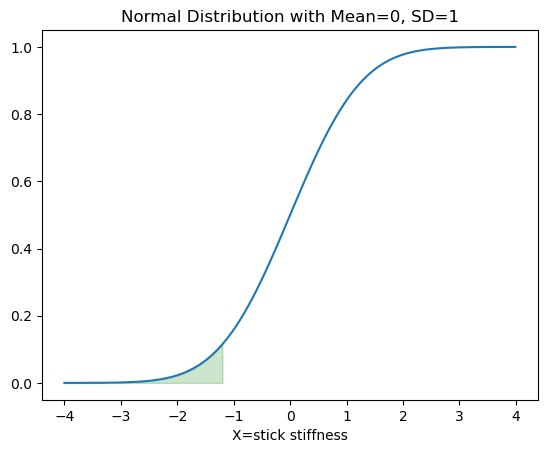

In [7]:
# we can plot the CDF if we wanted to
normal_B=norm.cdf(x_A,loc=0,scale=1)
ax1=sns.lineplot(x=x_A,y=normal_B)
ax2=plt.fill_between(x_A,normal_B, where=(x_A <-1.2),color='g',alpha=.2)
plt.xlabel("X=stick stiffness")
plt.title("Normal Distribution with Mean=0, SD=1")

**Next:** Find the area under a standard normal curve with Z<= z-score you calculated

Do this by looking it up on a standard normal table.

The probability is 0.115 that the z-score is less than or equal to -1.2

Check this using python to find the probability (Z<=z-score)

In [8]:
norm.cdf(-1.2)

0.11506967022170822

Remember this this the same as finding this on the unstandarized pdf and letting python run the standardization

Let's graph the unstandardized PDF below; note the loc=mean and std=scale here for our specified distribution.  

Text(0.5, 1.0, 'Normal Distribution with Mean=11.38, SD=0.1')

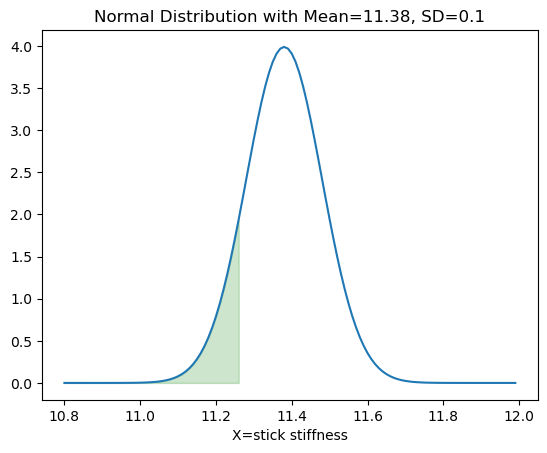

In [9]:
x_D = np.arange(10.8,12,.01)
normal_D=norm.pdf(x_D,loc=11.38,scale=.1)
ax1=sns.lineplot(x=x_D,y=normal_D)
ax2=plt.fill_between(x_D,normal_D, where=(x_D <11.26),color='g',alpha=.2)
plt.xlabel("X=stick stiffness")
plt.title("Normal Distribution with Mean=11.38, SD=0.1")

In [10]:
# The probability of finding x<= 11.26
norm.cdf(11.26,loc=11.38,scale=0.1)

0.11506967022170633

**Find the probability of a value being greater than or equal to some value in the normal distribution**

Let x=stick stiffness, x~N(mean=11.38 kN/m,variance=0.01)

What is the probability of x >= 11.26

Standardize to create a z-score = (x-mean)/sqrt(var) = (x-mean)/std

In [11]:
z= (11.26-11.38)/np.sqrt(0.01)
print(z)

-1.20000000000001


Text(0.5, 1.0, 'Normal Distribution with Mean=0, SD=1')

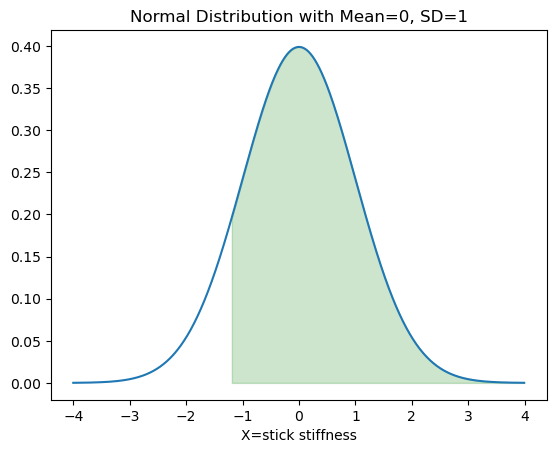

In [12]:
# We will plot this on the pdf
x_A = np.arange(-4,4,.01)
normal_A=norm.pdf(x_A,loc=0,scale=1)
ax1=sns.lineplot(x=x_A,y=normal_A)
ax2=plt.fill_between(x_A,normal_A, where=(x_A >-1.2),color='g',alpha=.2)
plt.xlabel("X=stick stiffness")
plt.title("Normal Distribution with Mean=0, SD=1")

Remember that the entire area under the curve is 1, so:

(area to the right of z=-1.2) = 1-(area to the left of z=-1.2)

Find the area under a standard normal curve with Z> z-score you calculated

Do this by looking it up on a standard normal table.

And calculate using scipy in python. 

By table:  1 - 0.1151 = 0.8849.

In [13]:
1-norm.cdf(-1.2)

0.8849303297782918

In python, you can can also specifically ask for the right tail probability by using the survival function sf=(1-cdf); try it out.

In [14]:
norm.sf(-1.2)

0.8849303297782918

**Find the probability of a value being between two values on the normal distribution**

You have a batch process with normally distributed yields x~N(85,16); mean=85, variance=16

What is the probability of yield values being between 77 adn 93g/L?

First:  standardize the values.

Sketch out the standard normal PDF and your z-scores to find the bounds of the probability you will compute. 

In [15]:
z1=(77-85)/np.sqrt(16)
z2=(93-85)/np.sqrt(16)
print(z1)
print(z2)

-2.0
2.0


Text(0.5, 1.0, 'Normal Distribution with Mean=0, SD=1')

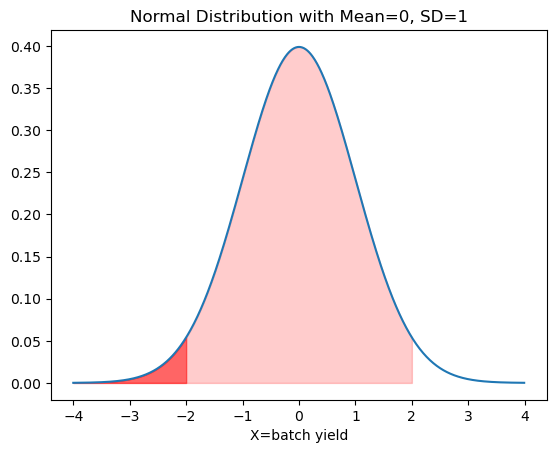

In [16]:
# Let's visualize this 
x_A = np.arange(-4,4,.01)
normal_A=norm.pdf(x_A,loc=0,scale=1)
ax1=sns.lineplot(x=x_A,y=normal_A)
ax2=plt.fill_between(x_A,normal_A, where=(x_A <-2),color='r',alpha=.5)
ax3=plt.fill_between(x_A,normal_A, where=(x_A <2), color='r', alpha=.2)
plt.xlabel("X=batch yield")
plt.title("Normal Distribution with Mean=0, SD=1")

You want the probability or the area under the curve between the z-values of z1 and z2

To find this subtract the area to the left of z1 from the area to the left of z2.

P(z1 < Z < z2) = P(Z<z2) - P(Z<z1) 

Find the area under a standard normal curve with Z between the z-scores you calculated

Do this by looking them up on a standard normal table.

And calculate using scipy in python. 

By table:  P(Z<z1)= P(Z<-2) = 0.0228

By table:  P(Z<z2)= P(Z<2) = 1- P(Z<-2) = 1 - 0.0228 = 0.9772

0.9772 - 0.0228 = 0.9544

In [17]:
print(norm.cdf(2))
print(norm.cdf(-2))
print("cdf of (z=2) - cdf of (z=-2) = " + str(norm.cdf(2) - norm.cdf(-2)))

0.9772498680518208
0.022750131948179195
cdf of (z=2) - cdf of (z=-2) = 0.9544997361036416


Remember this this the same as finding this on the unstandarized pdf and letting python run the standardization

Let's graph the unstandardized PDF below; note the loc=mean and std=scale here for our specified distribution.

Text(0.5, 1.0, 'Normal Distribution with Mean=85, SD=4')

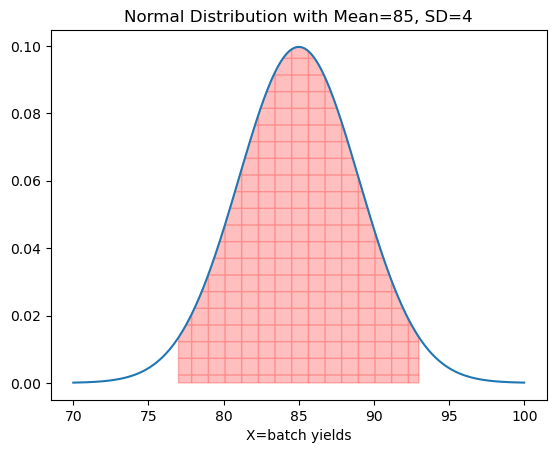

In [18]:
x_B = np.arange(70,100,.01)
normal_B=norm.pdf(x_B,loc=85,scale=4)
ax=sns.lineplot(x=x_B,y=normal_B)
ax=plt.fill_between(x_B, normal_B, where=((x_B>77) & (x_B<93)),color='r',alpha=.25,hatch="+")
plt.xlabel("X=batch yields")
plt.title("Normal Distribution with Mean=85, SD=4")